In [2]:
from SunImports import *
%load_ext autoreload
%autoreload 2

Optimal Parameters of Normaldistribution
----------------------------------------
tmax  = 2.44e+03 ± 17.4 s
sigma = 0.0748 ± 0.00183

Optimal Value of Beff
----------------------------------------
Beff  = 5.86 m



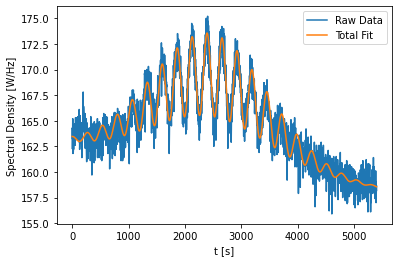

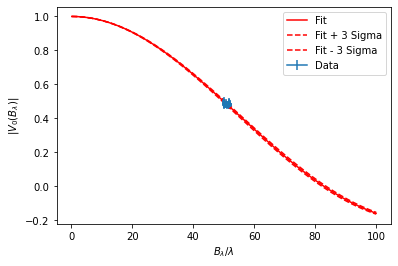

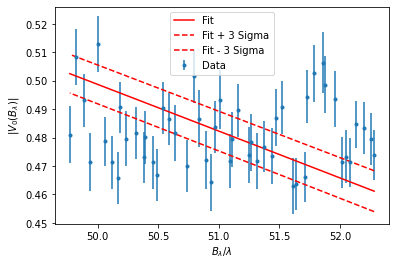

d = (1.808±0.005)×10⁹ m
alpha = 0.012085±0.000034 rad


In [3]:
files = ['Zweite Daten Sonne 10/ETH_20240110_111502_01.fit', 
         'Zweite Daten Sonne 10/ETH_20240110_113002_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_114502_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_120002_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_121502_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_123003_01.fit']
data, t, freq = glue_together(files)

# First Fit : Filter; p0 = (S0, tmax, sigma, a, b)
p0 = (100, 2500, 0.065, 0.1, 145.0)
data_filtered, params_tot, cov_tot, tmax_opt, sigma_opt, params_opt1, fmin = data_filter(data, t, (10, 60), p0)

# Second Fit: Signal; p0 = (V0, Beff, phi)
p0 = (0.6, 5, 0.0)
V0, V0_uncert, Bl, params_opt2, phi = data_fitter(data_filtered, t, freq, (10, 60), tmax_opt, sigma_opt, p0, fmin)

# Nice Plot
nice_plot(data, t, freq, params_opt1, params_opt2, fmin)

# Determine Diameter; p = alpha
p = np.deg2rad(0.5)
sun_diameter(V0, V0_uncert, Bl, p)

Optimal Parameters of Normaldistribution
----------------------------------------
tmax  = 2.06e+03 ± 21.4 s
sigma = 0.0804 ± 0.00273

Optimal Value of Beff
----------------------------------------
Beff  = 5.14 m



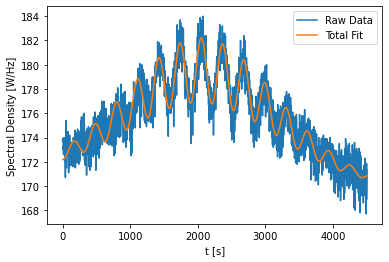

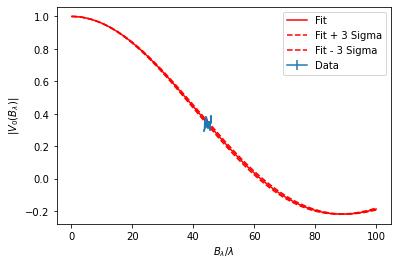

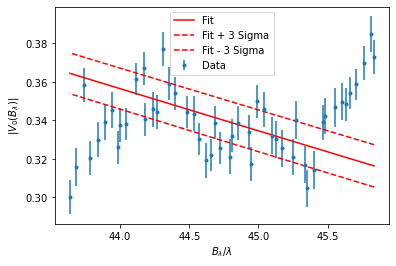

d = (2.408±0.009)×10⁹ m
alpha = 0.01610±0.00006 rad


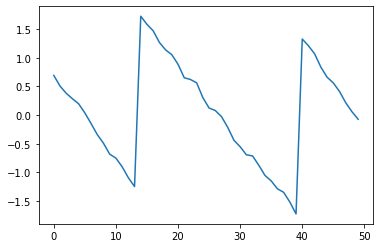

In [4]:
files = ['Dritte Daten Sonne 10/ETH_20240110_140003_01.fit', 
         'Dritte Daten Sonne 10/ETH_20240110_141503_01.fit',
         'Dritte Daten Sonne 10/ETH_20240110_143004_01.fit',
         'Dritte Daten Sonne 10/ETH_20240110_144504_01.fit',
         'Dritte Daten Sonne 10/ETH_20240110_150004_01.fit']
data, t, freq = glue_together(files)

# First Fit : Filter; p0 = (S0, tmax, sigma, a, b)
p0 = (100, 2500, 0.065, 0.1, 145.0)
data_filtered, params_tot, cov_tot, tmax_opt, sigma_opt, params_opt1, fmin = data_filter(data, t, (10, 60), p0)

# Second Fit: Signal; p0 = (V0, Beff, phi)
p0 = (0.6, 5, 0.0)
V0, V0_uncert, Bl, params_opt2, phi = data_fitter(data_filtered, t, freq, (10, 60), tmax_opt, sigma_opt, p0, fmin)

# Nice Plot
nice_plot(data, t, freq, params_opt1, params_opt2, fmin)

# Determine Diameter; p = alpha
p = np.deg2rad(0.5)
sun_diameter(V0, V0_uncert, Bl, p)
plt.plot(phi)